No weights:
Mean and standard deviation of E are 0.9009484849425994 and 0.2253911333460091
Mean and standard deviation of a are 1.5691099069307402 and 0.9063408346011348


With weights:
Mean and standard deviation of E are 0.6881719008075545 and 0.36085399798234086
Mean and standard deviation of a are 1.5191173321200748 and 0.9146823956683366


Mean value of the weights should be close to 1: 0.8139525330175634


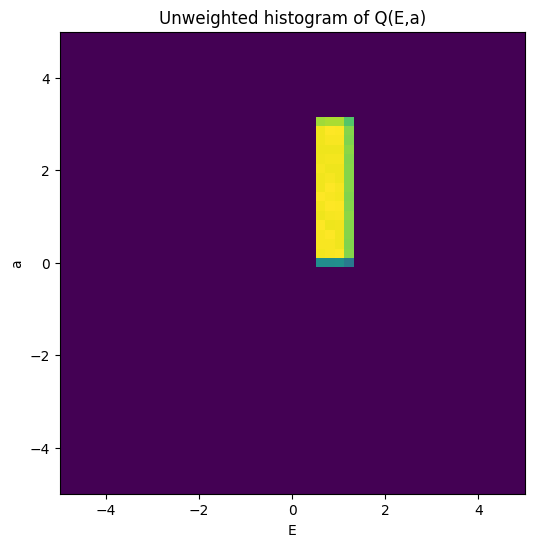

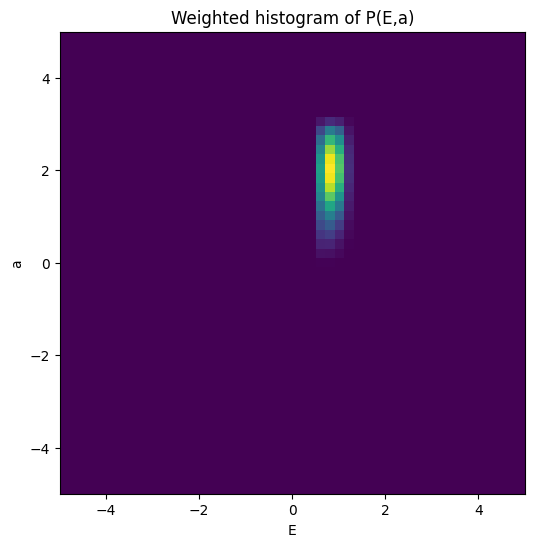

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants

A = 17.661
Em = 0.511
Emax = 1.292
alpha = 0.12

def mean(x,weights=None):
   
    if weights is not None:
        return np.mean(weights*x)
    else:
        return np.mean(x)

   
def std(x,weights=None):
   
    if weights is not None:
        return np.sqrt( np.mean(weights*x**2) - np.mean(weights*x)**2 )
    else:
        return np.std(x)

# Define PDFs
sigma = 2

# P(x,y)
def P(x,y):
    return np.sqrt(np.square(x)-Em**2)*x*A*0.5*np.square(Emax-x)*x*(1-((np.cos(y))*np.sqrt(1-np.square(Em/x))))*np.sin(y)
# Q_x(x)
def Q_E(E):
   
    return np.where( (E >= Em) & (E <= Emax), 1/(Emax-Em), 0)

# Q_y(x)
def Q_a(a):
   
    return np.where( (a >= 0) & (a <= np.pi), 1/(np.pi), 0)


num = 10**6
E_samples = np.random.uniform(Em,Emax,num)
a_samples = np.random.uniform(0,np.pi,num)
# Calculate weights
w = P(E_samples,a_samples)/(Q_E(E_samples)*Q_a(a_samples))


print('No weights:')
print('Mean and standard deviation of E are', mean(E_samples), 'and', std(E_samples) )
print('Mean and standard deviation of a are', mean(a_samples), 'and', std(a_samples) )

print('\n') # line break

# Compute mean with weights
print('With weights:')
print('Mean and standard deviation of E are', mean(E_samples,weights=w), 'and', std(E_samples,weights=w) )
print('Mean and standard deviation of a are', mean(a_samples,weights=w), 'and', std(a_samples,weights=w) )

print('\n') # line break

# Check that the weights are normalized to 1
print('Mean value of the weights should be close to 1:', np.mean(w))


bins = [np.linspace(-5,5), np.linspace(-5,5)]


# Unweighted histogram
plt.figure(figsize=(6,6))
plt.hist2d(E_samples,a_samples,bins=bins)
plt.title('Unweighted histogram of Q(E,a)')
plt.xlabel('E')
plt.ylabel('a')
plt.show()

# Weighted histogram
plt.figure(figsize=(6,6))
plt.hist2d(E_samples,a_samples,bins=bins,weights=w)
plt.title('Weighted histogram of P(E,a)')
plt.xlabel('E')
plt.ylabel('a')
plt.show()



In [11]:
count=0
kount=0
for i in range(num):
    if a_samples[i]>=0 and a_samples[i]<=np.pi/2:
        count+=1
    elif a_samples[i]>=np.pi/2 and a_samples[i]<=np.pi:
        kount+=1

h= kount/num 
s= count/num
print ("The fraction of electrons that are upward-going is",h ,"and the fraction of electrons that are downward-going is",s )


The fraction of electrons that are upward-going is 0.498869 and the fraction of electrons that are downward-going is 0.501131
